# 2.2.1 Visualization

## 1. 주기성과 계절성

### 1) 호주 전력 생산량 그래프

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [2]:
aus_production = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_production.csv')

#### 데이터 전처리

In [3]:
def parse_quarter_string(q):
    year, quarter = q.split(' Q')
    first_month_of_quarter = 3 * int(quarter) - 2
    return f"{year}-{first_month_of_quarter}-01"

aus_production['Quarter'] = aus_production['Quarter'].apply(parse_quarter_string)
aus_production['Quarter'] = pd.to_datetime(aus_production['Quarter'])
aus_production_filtered = aus_production[aus_production['Quarter'].dt.year >= 1980]

#### 시각화

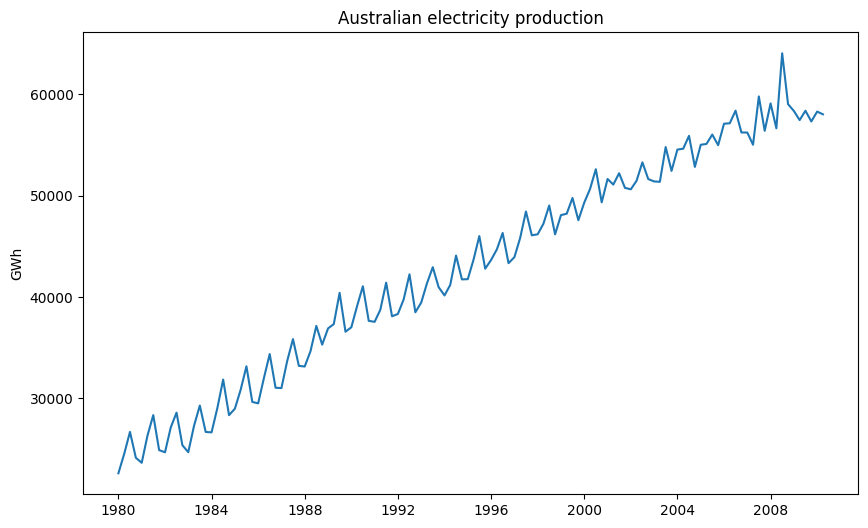

In [4]:
x = aus_production_filtered['Quarter'].to_numpy()
y = aus_production_filtered['Electricity'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylabel('GWh')
plt.title('Australian electricity production')
plt.show()

### 2) 호주 벽돌 생산량 그래프

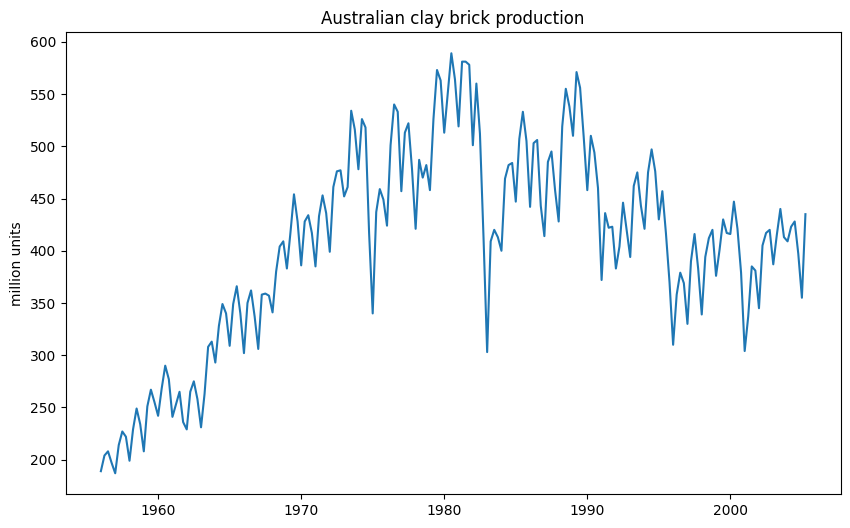

In [5]:
x = aus_production['Quarter'].to_numpy()
y = aus_production['Bricks'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x,y)
plt.ylabel('million units')
plt.title('Australian clay brick production')
plt.show()

### 3) 미국 근로자수 그래프

#### 데이터 불러오기

In [3]:
us_employment = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/us_employment.csv")

#### 데이터 전처리

In [7]:
us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')
filtered_data = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]

#### 시각화

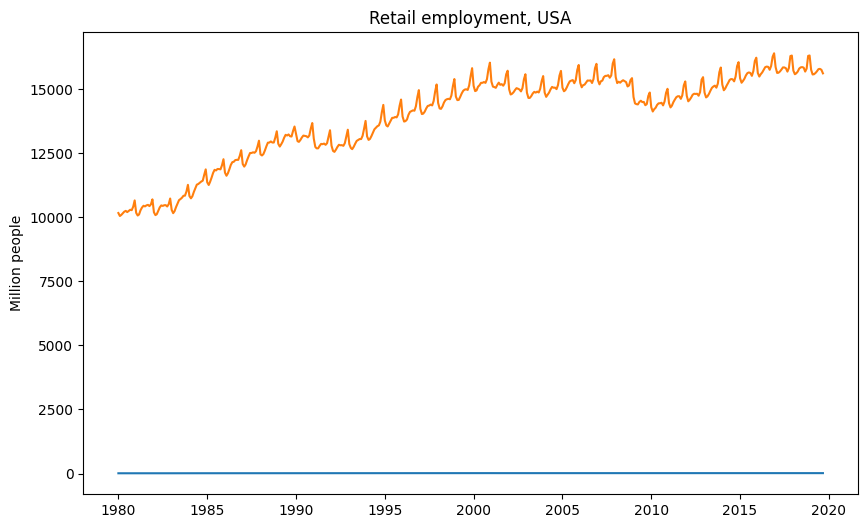

In [8]:
x = filtered_data['Month'].to_numpy()
y = filtered_data['Employed'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y/ 1e3)
plt.plot(x, y)
plt.ylabel('Million people')
plt.title('Retail employment, USA')
plt.show()

### 4) 아마존 주가 그래프

#### 데이터 불러오기

In [8]:
import yfinance as yf

# 애플(AAPL) 주식 데이터 가져오기
ticker = "AAPL"
start_date = "2024-01-01"
end_date = "2024-12-31"

# 주식 데이터 다운로드
stock = yf.download(ticker, start=start_date, end=end_date)

# 2024년 종가 데이터 추출
stock = stock[['Close']]

[*********************100%***********************]  1 of 1 completed


In [10]:
stock

Price,Close
Ticker,AAPL
Date,
2024-01-02,184.734970
2024-01-03,183.351746
2024-01-04,181.023178
2024-01-05,180.296707
2024-01-08,184.655365
...,...
2024-12-23,255.270004
2024-12-24,258.200012


#### 시각화

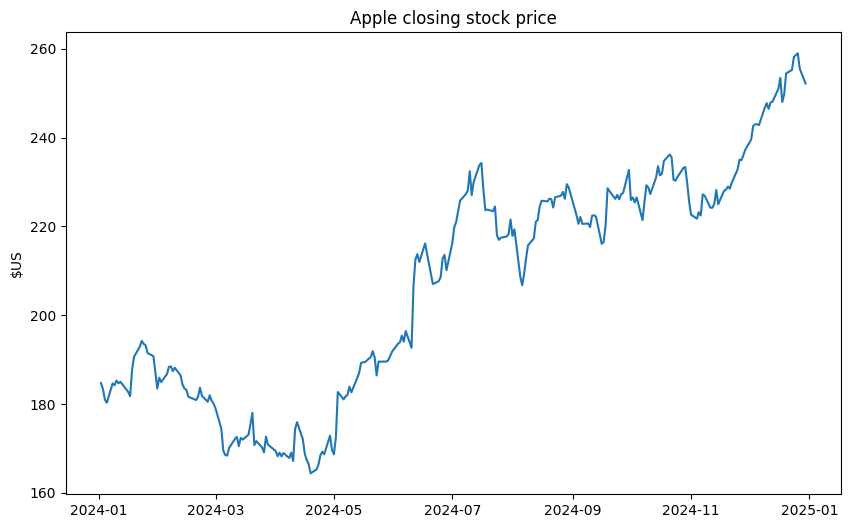

In [13]:
x = stock.index.to_numpy()
y = stock['Close'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylabel('$US')
plt.title('Apple closing stock price')
plt.show()

### 5) 스라소니 포획량 그래프

#### 데이터 불러오기

In [12]:
pelt = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/pelt.csv")

#### 시각화

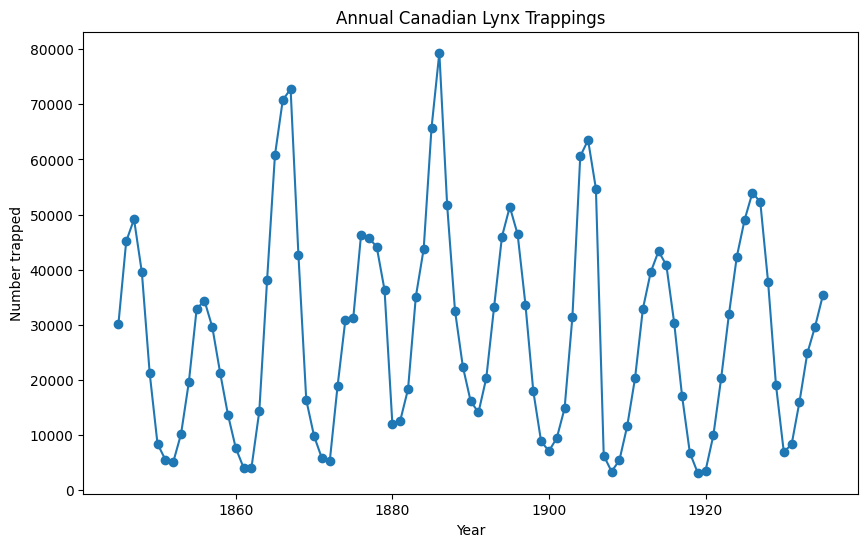

In [13]:
x = pelt['Year'].to_numpy()
y = pelt['Lynx'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.title('Annual Canadian Lynx Trappings')
plt.xlabel('Year')
plt.ylabel('Number trapped')
plt.show()

## 2. 계절성 그래프 (다중 계절성 그래프)

### 1) 빅토리아 전력 수요량 그래프

#### 데이터 불러오기

In [14]:
vic_elec = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/vic_elec.csv")

#### 데이터 전처리

In [15]:
vic_elec['Time'] = pd.to_datetime(vic_elec['Time'])

#### 시각화

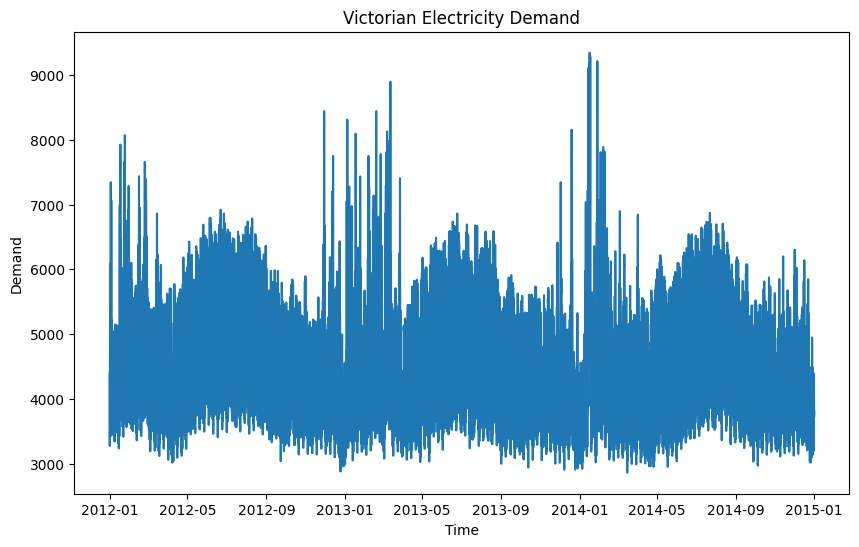

In [16]:
x = vic_elec['Time'].to_numpy()
y = vic_elec['Demand'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Victorian Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

### 2) 빅토리아 연간 전력 수요량 다중 계절성 그래프

#### 필요한 패키지 불러오기

In [17]:
import matplotlib.dates as mdates

#### 데이터 전처리

In [18]:
vic_elec['Year'] = vic_elec['Time'].dt.year
vic_elec['Normalized_Time'] = vic_elec['Time'].apply(lambda dt: dt.replace(year=2012))

#### 시각화

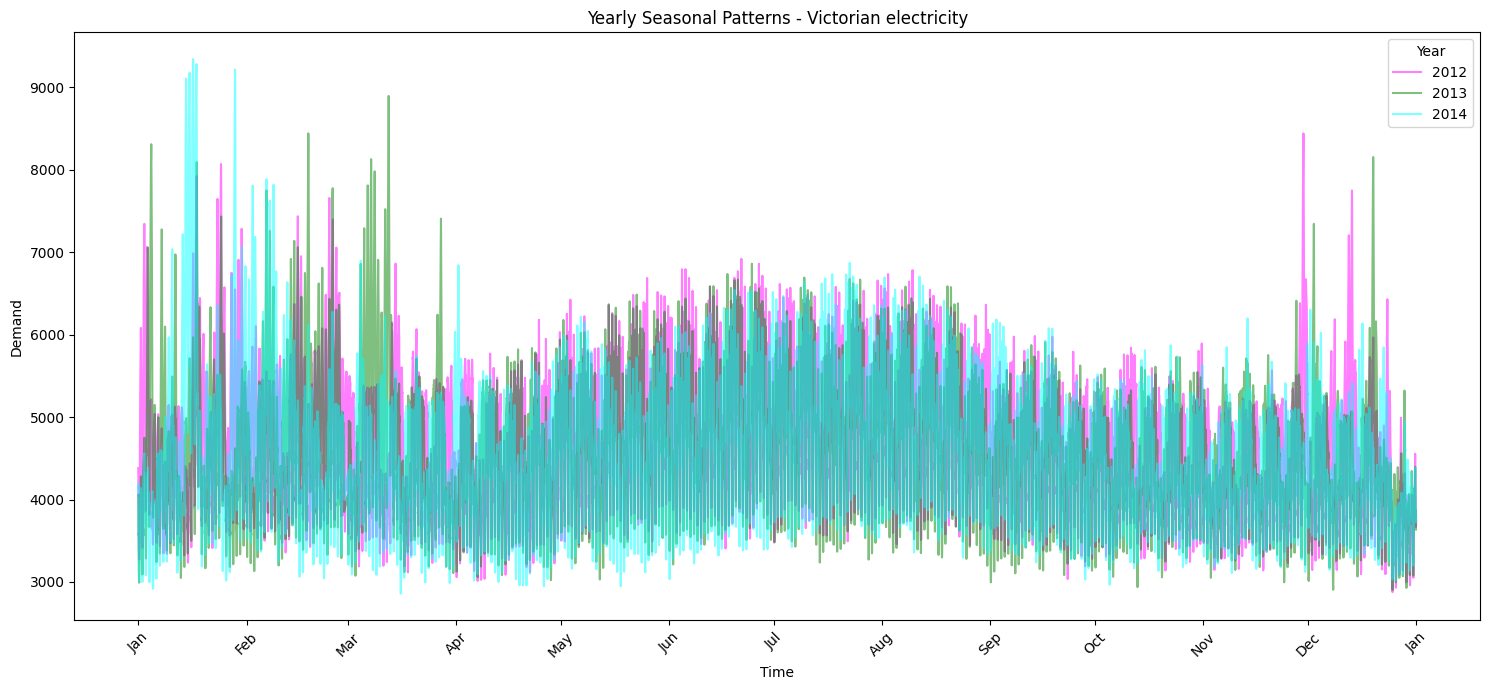

In [19]:
plt.figure(figsize=(15, 7))
colors = {2012: 'magenta', 2013: 'green', 2014: 'cyan'}

for year in sorted(vic_elec['Year'].unique()):
    yearly_data = vic_elec[vic_elec['Year'] == year]
    yearly_data = yearly_data.sort_values(by='Normalized_Time')
    x = yearly_data['Normalized_Time'].to_numpy()
    y = yearly_data['Demand'].to_numpy()
    plt.plot(x, y,
             color=colors[year], alpha=0.5, label=str(year))

plt.title('Yearly Seasonal Patterns - Victorian electricity')
plt.xlabel('Time')
plt.ylabel('Demand')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### 3) 빅토리아 일간 전기 수요량 다중 계절성 그래프

#### 데이터 전처리

In [20]:
vic_elec['Normalized_Date'] = vic_elec['Time'].dt.normalize()
vic_elec['Time_of_day'] = vic_elec['Time'].dt.hour + vic_elec['Time'].dt.minute / 60

#### 시각화

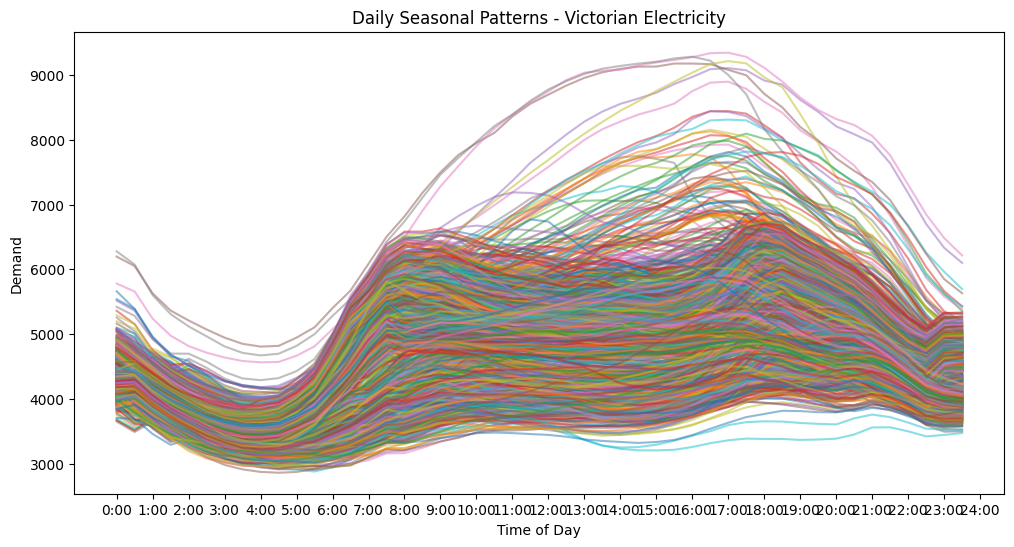

In [21]:
plt.figure(figsize=(12, 6))

daily_groups = vic_elec.groupby(vic_elec['Normalized_Date'])
for name, group in daily_groups:
    x = group['Time_of_day'].to_numpy()
    y = group['Demand'].to_numpy()
    plt.plot(x, y, label=name.strftime('%d/%m/%Y'), alpha=0.5)

plt.title('Daily Seasonal Patterns - Victorian Electricity')
plt.xlabel('Time of Day')
plt.ylabel('Demand')

plt.xticks(range(25), [f'{hour}:00' for hour in range(25)])
plt.show()

## 2. 계절성 그래프 (부분 시계열 그래프) 

### 1) 호주 분기별 맥주 생산량 계절별 부분 시계열 그래프

#### 필요한 패키지 불러오기 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### 데이터 불러오기 

In [23]:
aus_production = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_production.csv')

#### 데이터 전처리 

In [24]:
def parse_quarter(quarter_string):
    year, quarter = quarter_string.split(' ')
    year = int(year)
    quarter = int(quarter[1])
    month = 3 * quarter - 2
    return pd.Timestamp(year=year, month=month, day=1)

aus_production['Quarter'] = aus_production['Quarter'].apply(parse_quarter)
aus_production['Year'] = aus_production['Quarter'].dt.year
aus_production['Quarter_num'] = aus_production['Quarter'].dt.quarter

beer = aus_production[aus_production['Year'] >= 1992]

#### 시각화 

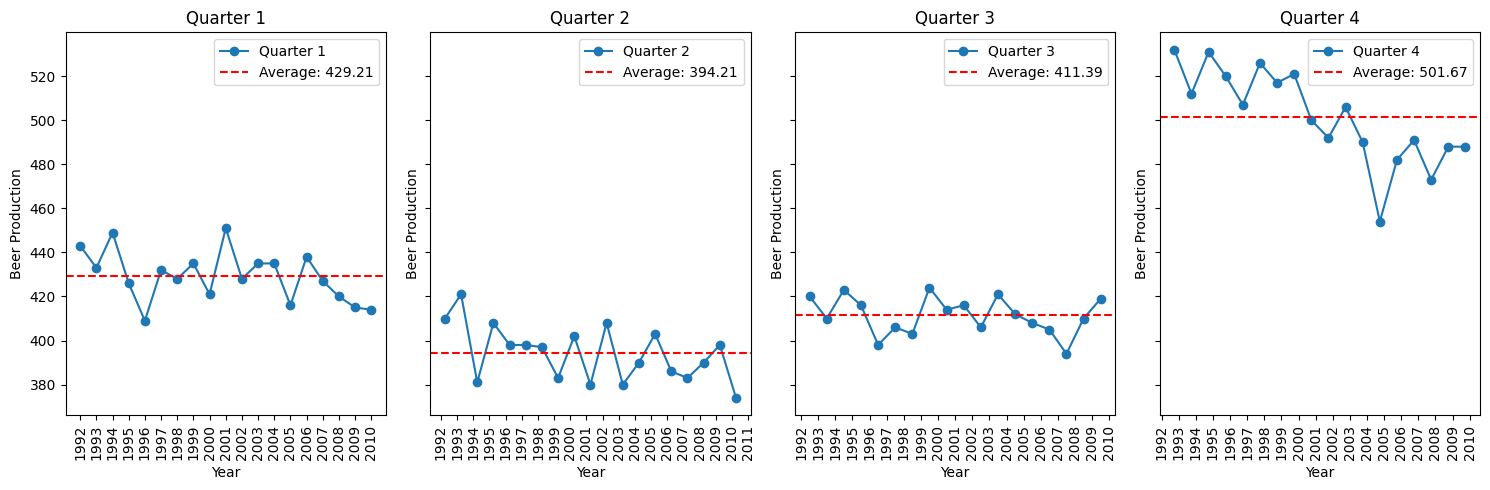

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)  # Adjusted figsize for horizontal layout

for i in range(1, 5):
    ax = axes[i-1]
    quarter_data = beer[beer['Quarter_num'] == i]
    x = quarter_data['Quarter'].to_numpy()
    y = quarter_data['Beer'].to_numpy()
    ax.plot(x, y, marker='o', label=f'Quarter {i}')
    avg = quarter_data['Beer'].mean()
    ax.axhline(y=avg, color='r', linestyle='--', label=f'Average: {avg:.2f}')

    ax.set_title(f'Quarter {i}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Beer Production')
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.legend()

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

## 3. 산점도

### 전력 수요와 기온 간의 산점도

#### 필요한 패키지 불러오기 

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

####  데이터 불러오기

In [27]:
vic_elec = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/vic_elec.csv")

#### 데이터 전처리

In [28]:
vic_elec['Time'] = pd.to_datetime(vic_elec['Time'])
vic_elec_2014 = vic_elec[vic_elec['Time'].dt.year == 2014]

def get_day_type(row):
    if row['Holiday']:
        return "Holiday"
    elif row['Time'].dayofweek < 5:
        return "Weekday"
    else:
        return "Weekend"

vic_elec_2014['Day_Type'] = vic_elec_2014.apply(get_day_type, axis=1)
vic_elec_day_type = vic_elec_2014

#### 시각화

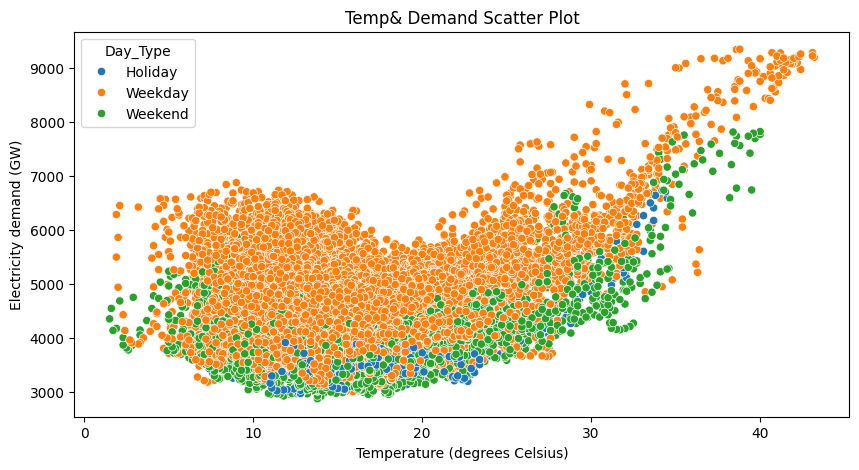

Temperature와 Demand의 상관계수: 0.2797854293021628


In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=vic_elec_day_type, x='Temperature', y='Demand', hue='Day_Type')
plt.xlabel('Temperature (degrees Celsius)')
plt.ylabel('Electricity demand (GW)')
plt.title('Temp& Demand Scatter Plot')
plt.show()

correlation = vic_elec_2014['Temperature'].corr(vic_elec_2014['Demand'])
print("Temperature와 Demand의 상관계수:", correlation)

## 4. 지연 그래프

#### 필요한 패키지 불러오기

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

#### 데이터 불러오기

In [31]:
aus_production['Quarter'] = pd.to_datetime(aus_production['Quarter'])

#### 데이터 전처리

In [32]:
new_production = aus_production[aus_production['Quarter'].dt.year >= 1992]

#### Lag에 따른 시각화

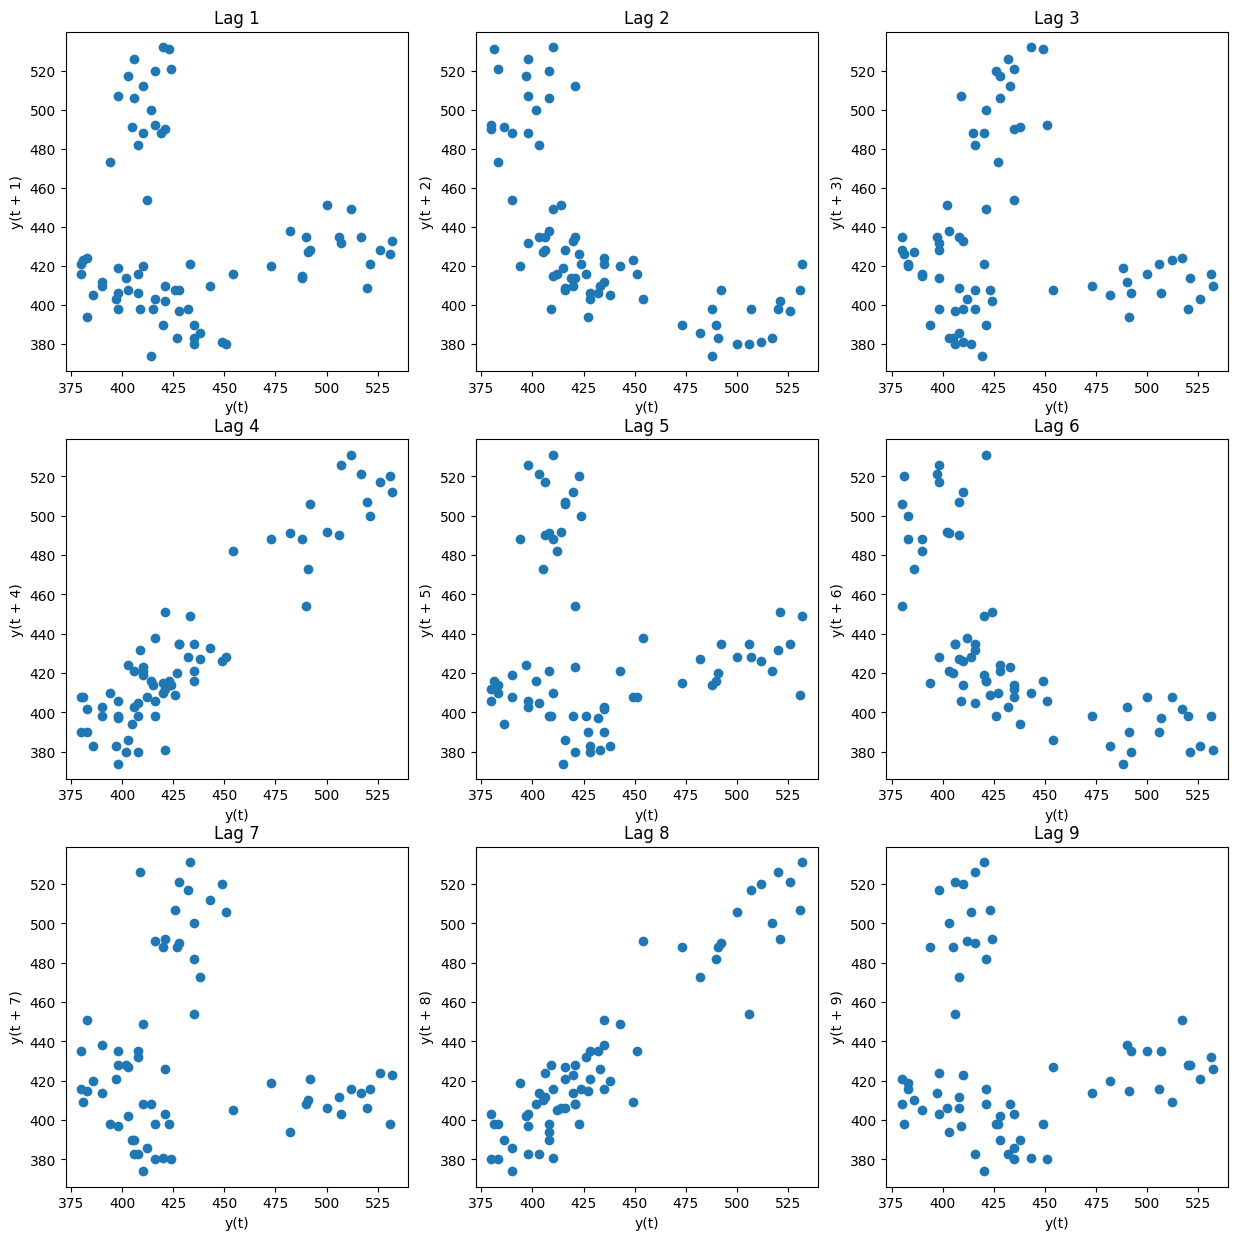

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate over different lags
for i, ax in enumerate(axes.flatten(), 1):
    lag_plot(new_production['Beer'], lag=i, ax=ax)
    ax.set_title(f'Lag {i}')
     
plt.show()

# 2.2.2 Auto Correlation

## 3. 자기상관 함수

### 1) 미국 소매업 고용자 수 데이터

#### 필요한 함수 불러오기

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

#### 데이터 전처리

In [35]:
retail = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]

#### 시각화

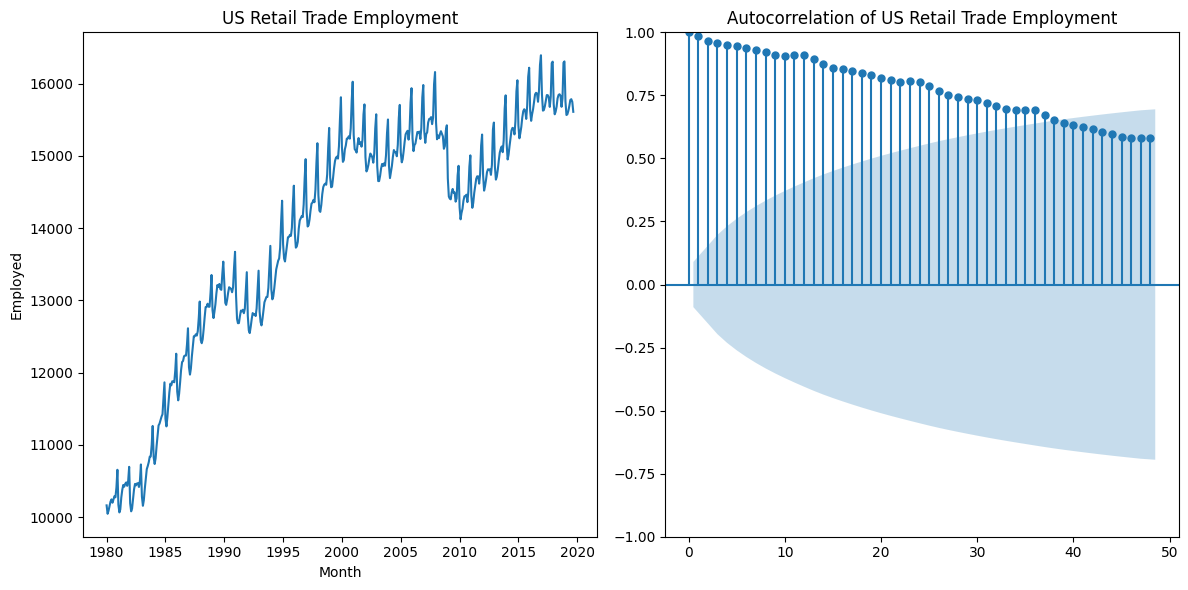

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = retail['Month'].to_numpy()
y = retail['Employed'].to_numpy()

ax1.plot(x, y)
ax1.set_title('US Retail Trade Employment')
ax1.set_xlabel('Month')
ax1.set_ylabel('Employed')

plot_acf(retail['Employed'], lags=48, ax=ax2)
ax2.set_title('Autocorrelation of US Retail Trade Employment')

plt.tight_layout()
plt.show()

### 2) 구글 주가 데이터

#### 데이터 전처리

In [14]:
# 애플(AAPL) 주식 데이터 가져오기
ticker = "AAPL"
start_date = "2024-01-01"
end_date = "2024-12-31"

# 주식 데이터 다운로드
stock = yf.download(ticker, start=start_date, end=end_date)

# 2024년 종가 데이터 추출
stock = stock[['Close']]

[*********************100%***********************]  1 of 1 completed


#### 시각화

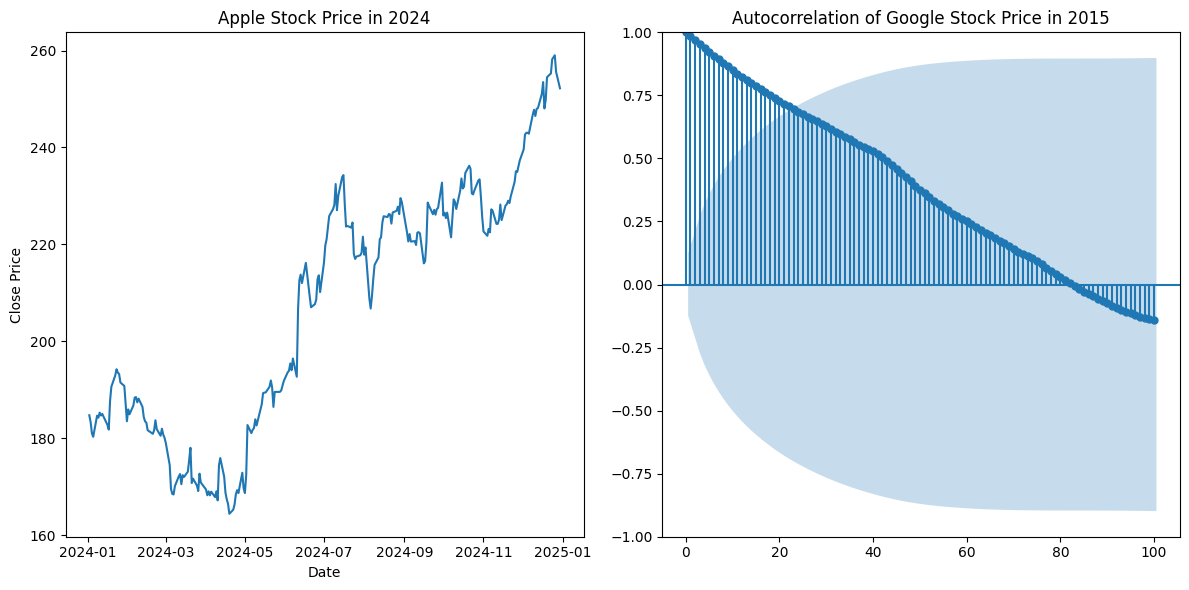

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = stock.index.to_numpy()
y = stock['Close'].to_numpy()
ax1.plot(x, y)
ax1.set_title('Apple Stock Price in 2024')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')

plot_acf(stock['Close'], lags=100, ax=ax2)
ax2.set_title('Autocorrelation of Apple Stock Price in 2024')

plt.tight_layout()
plt.show()

## 5. 백색 잡음

### 빅토리아주 돼지 도살 수 데이터

#### 필요한 패키지 불러오기

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

#### 데이터 불러오기

In [40]:
aus_livestock = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_livestock.csv')

#### 데이터 전처리

In [41]:
aus_livestock['Month'] = pd.to_datetime(aus_livestock['Month'])
pigs = aus_livestock[(aus_livestock['State'] == "Victoria") &
                     (aus_livestock['Animal'] == "Pigs") &
                     (aus_livestock['Month'].dt.year >= 2014)]

#### 시각화

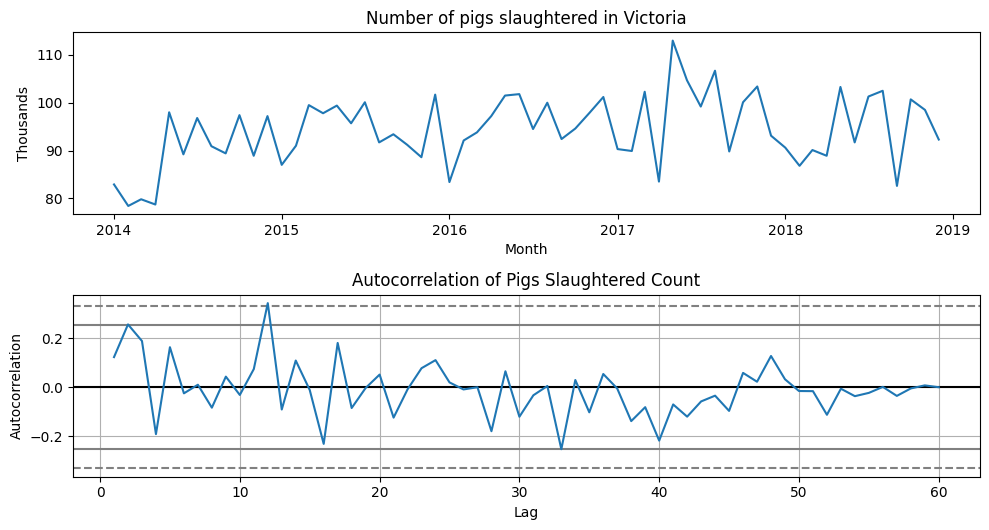

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5.4))

x = pigs['Month'].to_numpy()
y = pigs['Count'].to_numpy()

ax1.plot(x, y/ 1e3)
ax1.set_title('Number of pigs slaughtered in Victoria')
ax1.set_ylabel('Thousands')
ax1.set_xlabel('Month')

autocorrelation_plot(pigs['Count'], ax=ax2)
ax2.set_title('Autocorrelation of Pigs Slaughtered Count')

plt.tight_layout()
plt.show()